# Initial SubTasks

## Reading data

In [1]:
# import required libraries
import pandas as pd
import numpy as np

In [2]:
#read event and non event data
event_columns =['device_id','gender','age','group','event_id','timestamp','longitude','latitude']
non_event_columns =['device_id','gender','age','group','phone_brand','device_model']

#load data from S3
df_event = pd.read_csv('https://upgradcapstone.s3.amazonaws.com/event-data/event_data.csv', header=None, names=event_columns)
#load data from S3
df_non_event = pd.read_csv('https://upgradcapstone.s3.amazonaws.com/non-event-data/non_event_data.csv', header=None, names=non_event_columns)

#read app data

df_labels =  pd.read_csv('https://upgradcapstone.s3.amazonaws.com/app-data/app_labels.csv')
df_label_cat =  pd.read_csv('https://upgradcapstone.s3.amazonaws.com/app-data/label_categories.csv')
df_app_events = pd.read_csv('https://upgradcapstone.s3.amazonaws.com/app-data/app_events.csv')

#df_app = pd.read_csv('app_data.csv')

C:\Users\akshay.a\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#check dataframes for sanity
df_event.head(2)

,device_id,gender,age,group,event_id,timestamp,longitude,latitude
0,-7548291590301750000,M,33,M32+,414,2016-05-03 00:05:31,116.79,33.98
1,-7548291590301750000,M,33,M32+,2604805,2016-05-04 03:01:32,116.79,33.98


In [4]:
df_non_event.head(2)

,device_id,gender,age,group,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote


In [5]:
df_app_events.head(2)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0


In [6]:
df_labels.head(2)

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251


In [7]:
df_label_cat.head(2)

,label_id,category
0,1,NaN
1,2,game-game type


In [8]:
df_app_events.event_id.count(), df_event.device_id.count(), df_non_event.device_id.count() #(32473067, 1266933, 74840)

(32473067, 1266933, 74840)

## Cleaning data

### Clean event data

In [9]:
df_event.dtypes

device_id     int64
gender       object
age           int64
group        object
event_id     object
timestamp    object
longitude    object
latitude     object
dtype: object

In [10]:
#replace invalid chars with a None
df_event = df_event.replace({"\\N": None})

In [11]:
# correct data types
df_event.timestamp = pd.to_datetime(df_event.timestamp)
df_event.event_id = pd.to_numeric(df_event.event_id, errors='coerce')
df_event.longitude = pd.to_numeric(df_event.longitude, errors='coerce')
df_event.latitude  = pd.to_numeric(df_event.latitude, errors='coerce')

In [12]:
df_event = df_event.dropna()

In [13]:
df_event.device_id.count() #829966

1215598

### Clean non event data


In [14]:
df_non_event.count()

device_id       74840
gender          74840
age             74840
group           74840
phone_brand     74840
device_model    74840
dtype: int64

In [15]:
#check for duplicate data
df_non_event.device_id.nunique(), df_non_event.shape[0]

(74645, 74840)

There are some duplicates in device_id column, lets drop them

In [16]:
#drop duplicate device_id
df_non_event.drop_duplicates(subset='device_id', inplace=True)

In [17]:
df_non_event.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


##  EDA and Visualisations

### 1.Plot appropriate graphs representing the distribution of age and gender in the data set [univariate].

In [18]:
# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

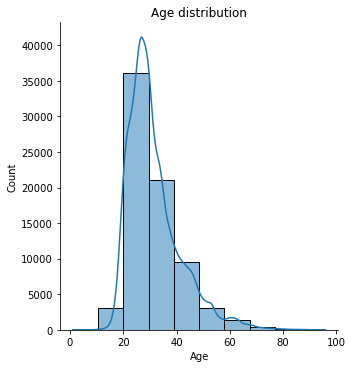

In [19]:
#plot the graph from non_event_data dataset
sns.displot(df_non_event.age, kde=True, bins = 10)
plt.title('Age distribution')
plt.xlabel("Age")
plt.show()

Observation: With the plot above we can infer that the age is imbalanced and the majority of users are in their late 20s or early 30s

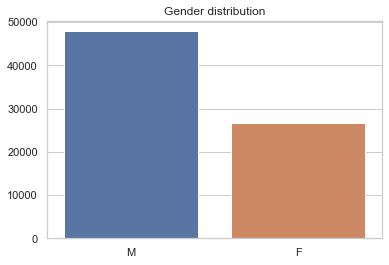

In [20]:
sns.set_theme(style="whitegrid")
sns.barplot(x=df_non_event.gender.value_counts().index, y=df_non_event.gender.value_counts().values)
plt.title('Gender distribution')
plt.show()


Observation : Here we can see that tha gender is also not balanced. Male possess more phones than woman

### 2. Boxplot analysis for gender and age [bivariate].

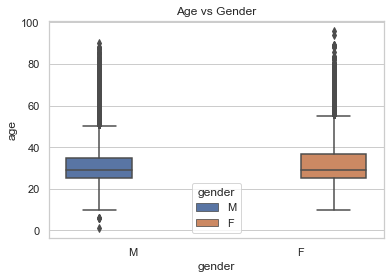

In [21]:
sns.boxplot(x="gender", y="age", hue ="gender", data= df_non_event)
plt.title('Age vs Gender')
plt.show()

Observation: When we look at the plot above we can see that the median age for male and female is almost same. We also are able to see much more outliers for male segment than female.

### 3.Plot the percentage of the device_ids with and without event data. 

In [22]:
df_event.dtypes

device_id             int64
gender               object
age                   int64
group                object
event_id            float64
timestamp    datetime64[ns]
longitude           float64
latitude            float64
dtype: object

In [23]:
df_event['has_event'] = np.where(df_event.event_id.isnull(), 0, 1)

In [24]:
df_event.event_id.count(),df_event.event_id.isnull().count()

(1215598, 1215598)

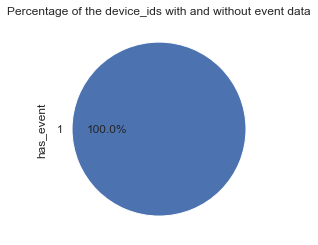

In [25]:
#df_event['has_event'].plot.pie()
temp_device_per = df_event.groupby("has_event")['has_event'].count() /df_event.has_event.count() *100 
temp_device_per.plot.pie(autopct="%.1f%%")
plt.title('Percentage of the device_ids with and without event data')
plt.show()

Observation: We can see that the percentage of device id with event data is significantly high is this case.

### 4. Plot a graph representing the distribution of events over different days of a week. 

In [26]:
import  calendar

In [27]:
df_event['week_day'] = df_event.timestamp.dt.day_name()

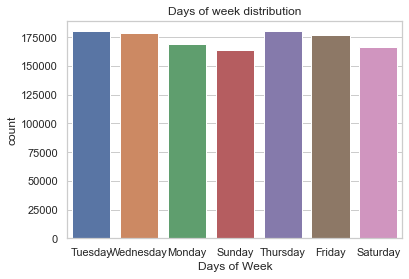

In [28]:
sns.countplot(data=df_event, x= 'week_day')
plt.title('Days of week distribution')
plt.xlabel('Days of Week')
plt.show()

Observation: The number of events over weekend seems to have a little low count as compared to weekdays.

### 5. Plot a graph representing the distribution of events per hour [for one-week data].

In [29]:
df_event['hour_day'] = df_event.timestamp.dt.hour
df_event['week'] = df_event.timestamp.dt.isocalendar().week
df_event['year'] = pd.to_numeric(df_event.timestamp.dt.year, downcast='signed')

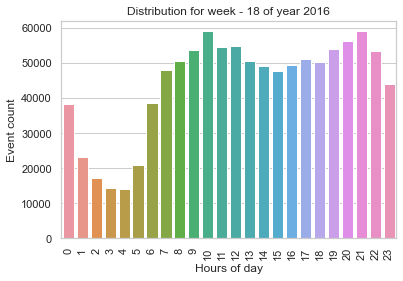

In [30]:
sns.countplot(data = df_event[(df_event.week == 18 ) & (df_event.year == 2016 ) ], x= 'hour_day')
plt.title('Distribution for week - 18 of year 2016')
plt.xlabel("Hours of day")
plt.ylabel("Event count")
plt.xticks(rotation="90")
plt.show()

Observation: As we can see that the count of events are much higher near noon and during night time.

### 6. The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]

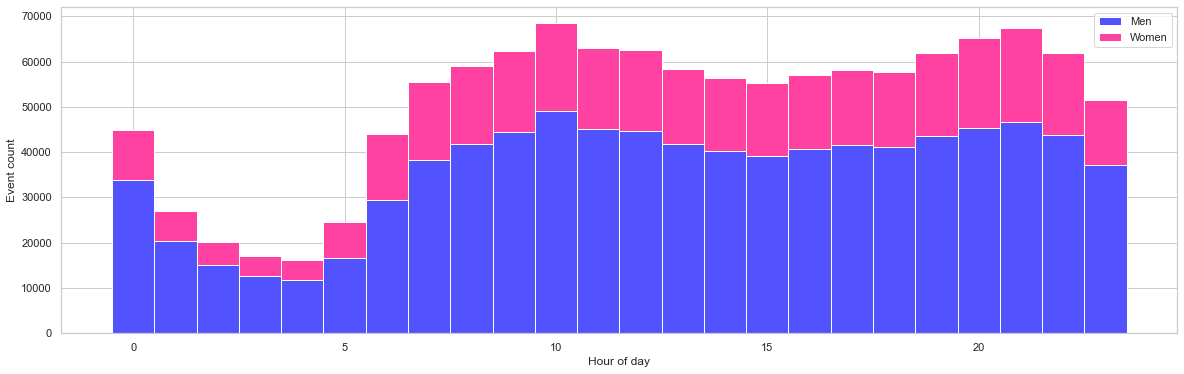

In [31]:
male_hour_count = df_event[df_event.gender == 'M'].groupby('hour_day')['hour_day'].count().values
female_hour_count = df_event[df_event.gender == 'F'].groupby('hour_day')['hour_day'].count().values
bars = np.arange(24) # a day has 24 hours
width = 1
plt.figure(figsize=(20,6))

p1 = plt.bar(bars, male_hour_count, width, color="#5252ff", label='Men')
p2 = plt.bar(bars, female_hour_count, width, color="#ff42a1", bottom=male_hour_count, label='Women')
plt.ylabel('Event count')
plt.xlabel('Hour of day')
plt.legend()
plt.show()



Observation: Here we can see that Men are more active than Women, as Men have more events raised as compared to woman.

### 7. Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [32]:
df_event.head(5)

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,has_event,week_day,hour_day,week,year
0,-7548291590301750000,M,33,M32+,414.0,2016-05-03 00:05:31,116.79,33.98,1,Tuesday,0,18,2016
1,-7548291590301750000,M,33,M32+,2604805.0,2016-05-04 03:01:32,116.79,33.98,1,Wednesday,3,18,2016
2,-7548291590301750000,M,33,M32+,2588911.0,2016-05-03 16:14:14,116.79,33.98,1,Tuesday,16,18,2016
3,-7548291590301750000,M,33,M32+,2586055.0,2016-05-02 14:36:04,116.79,33.98,1,Monday,14,18,2016
4,-7548291590301750000,M,33,M32+,2560938.0,2016-05-02 18:01:00,116.79,33.98,1,Monday,18,18,2016


In [33]:
def get_group_cat(x):
    if(x<=24):
        return '0-24'
    elif(x>=25 and x<=32):
        return '25-32'
    elif(x>=33 and x<=45):
        return '33-45'
    else:
        return '46+'    
    
    
df_event['group_cat'] = df_event.age.apply(get_group_cat)

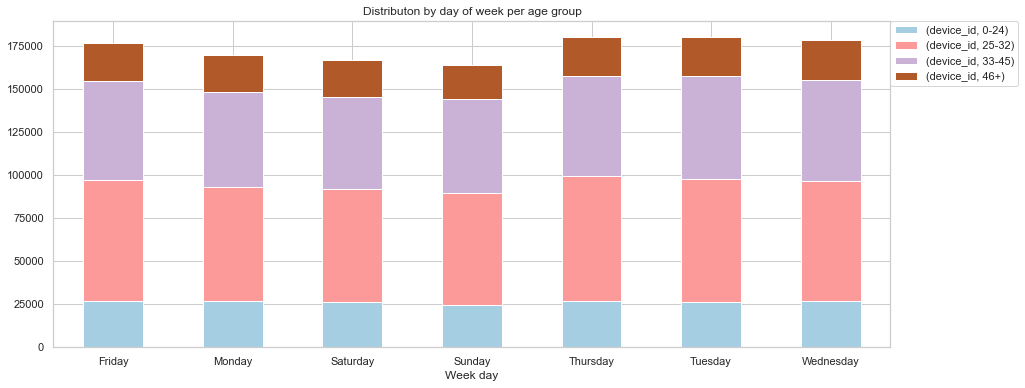

In [34]:
age_h = (df_event
           .groupby(['week_day', 'group_cat'])
           .agg('count')
           ) 

#age_h
age_h = age_h['device_id'].reset_index()
#age_h

groups = age_h.pivot(index='week_day', columns='group_cat') 
#groups

ax = groups.plot(kind='bar', stacked=True, colormap='Paired', rot=0, figsize=(15,6))
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.title("Distributon by day of week per age group")
plt.xlabel("Week day")
handles, labels = ax.get_legend_handles_labels()

Observation: The chart above shows that Yes! there is a difference in distribution of Events for different Age Groups over different days of the week. Here we can see that age 25-32 and 33-45 are more dominant than the rest of the age groups


### 8.Stacked bar chart for the top 10 mobile brands across male and female consumers.

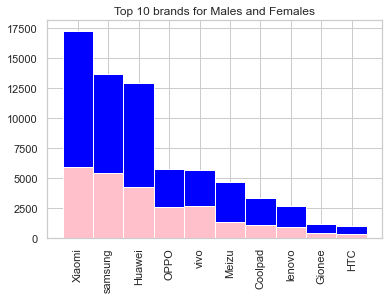

In [35]:
top_most_popular = df_non_event.phone_brand.value_counts().head(10)

female_top_count = [ df_non_event[(df_non_event.phone_brand.str.strip() == i.strip()) & (df_non_event.gender =='F')]['phone_brand'].count() for i in  top_most_popular.index ]
male_top_count =   [ df_non_event[(df_non_event.phone_brand.str.strip() == i.strip()) & (df_non_event.gender =='M')]['phone_brand'].count() for i in  top_most_popular.index ]


plt.bar(top_most_popular.index,female_top_count , color='pink', width=1 )
plt.bar(top_most_popular.index,male_top_count, bottom =  female_top_count, color='blue', width=1  )
plt.xticks(rotation=90)
plt.title('Top 10 brands for Males and Females')
plt.show()

Observation: We can see that Xiaomi is most popular brand while HTC is least desirable

### 9.Prepare a chart representing the ten frequently used applications and their respective male and female percentage.

In [36]:
#lets join events_data and app_events data
df_app_event = df_app_events.merge(df_event, on='event_id')
df_app_event.head()

,event_id,app_id,is_installed,is_active,device_id,gender,age,group,timestamp,longitude,latitude,has_event,week_day,hour_day,week,year,group_cat
0,6,-7377004479023402858,1,1,1476664663289710000,M,19,M0-24,2016-05-01 00:27:21,0.0,0.0,1,Sunday,0,17,2016,0-24
1,6,6284164581582112235,1,1,1476664663289710000,M,19,M0-24,2016-05-01 00:27:21,0.0,0.0,1,Sunday,0,17,2016,0-24
2,6,5927333115845830913,1,1,1476664663289710000,M,19,M0-24,2016-05-01 00:27:21,0.0,0.0,1,Sunday,0,17,2016,0-24
3,6,3433289601737013244,1,1,1476664663289710000,M,19,M0-24,2016-05-01 00:27:21,0.0,0.0,1,Sunday,0,17,2016,0-24
4,6,-3467200097934864127,1,1,1476664663289710000,M,19,M0-24,2016-05-01 00:27:21,0.0,0.0,1,Sunday,0,17,2016,0-24


In [37]:
freq_used_app = df_app_event.app_id.value_counts().head(10)
freq_used_app

 8693964245073640147    433106
 5927333115845830913    338681
 4348659952760821294    304722
 628020936226491308     239018
 3433289601737013244    147057
-2320783822570582843    112841
 6284164581582112235    103677
 5729517255058371973    101888
 8948670408023620661     99963
 3683147815759994238     98647
Name: app_id, dtype: int64

In [38]:
female_top_count = [ df_app_event[(df_app_event.app_id == i) & (df_app_event.gender =='F')]['gender'].count() for i in  freq_used_app.index ]
male_top_count = [ df_app_event[(df_app_event.app_id == i) & (df_app_event.gender =='M')]['gender'].count() for i in  freq_used_app.index ]

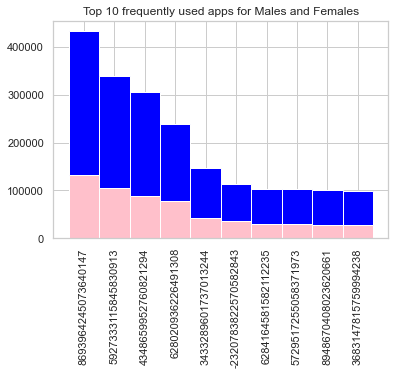

In [39]:
ind = [str(i) for i in freq_used_app.index]
plt.figure()
plt.bar(ind,female_top_count, color='pink', width=1 )
plt.bar(ind,male_top_count, bottom =  female_top_count, color='blue', width=1  )
plt.xticks(rotation=90)
plt.title('Top 10 frequently used apps for Males and Females')
plt.show()

Observation: As we can see that the male users are more for top 10 feequently used apps as compared to female

### 10.List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [40]:
df_non_event['group_cat'] = df_non_event.age.apply(get_group_cat)
df_non_event.head()

,device_id,gender,age,group,phone_brand,device_model,group_cat
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C,33-45
1,6943568600617760000,M,37,M32+,Xiaomi,xnote,33-45
2,5441349705980020000,M,40,M32+,OPPO,R7s,33-45
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4,33-45
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4,46+


In [41]:
top_mobile_bought = df_non_event.phone_brand.value_counts().head(10)
top_mobile_bought

Xiaomi     17300
samsung    13669
Huawei     12960
OPPO        5783
vivo        5637
Meizu       4698
Coolpad     3339
lenovo      2691
Gionee      1123
HTC         1013
Name: phone_brand, dtype: int64

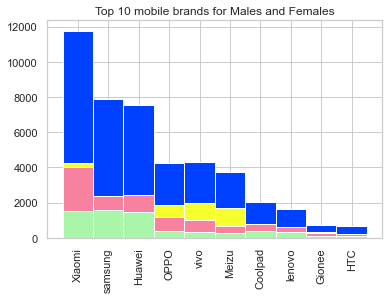

In [42]:
young_users = [ df_non_event[(df_non_event.phone_brand.str.strip() == i.strip()) & (df_non_event.group_cat.str.strip() =='0-24')]['group_cat'].count() for i in  top_mobile_bought.index ]
adults_users = [ df_non_event[(df_non_event.phone_brand.str.strip() == i.strip()) & (df_non_event.group_cat.str.strip() =='25-32')]['group_cat'].count() for i in  top_mobile_bought.index ]
mid_age_users = [ df_non_event[(df_non_event.phone_brand.str.strip() == i.strip()) & (df_non_event.group_cat.str.strip() =='33-45')]['group_cat'].count() for i in  top_mobile_bought.index ]
old_users = [ df_non_event[(df_non_event.phone_brand.str.strip() == i.strip()) & (df_non_event.group_cat.str.strip() =='46+')]['group_cat'].count() for i in  top_mobile_bought.index ]



plt.figure()
plt.bar(top_mobile_bought.index,young_users, color='#F7FE2E', width=1 )
plt.bar(top_mobile_bought.index,mid_age_users,  color='#F7819F', width=1 )
plt.bar(top_mobile_bought.index,old_users,  color='#A9F5A9', width=1 )
plt.bar(top_mobile_bought.index,adults_users,  bottom =  young_users, color='#0040FF', width=1 )


plt.xticks(rotation=90)
plt.title('Top 10 mobile brands for Males and Females')
plt.show()

In [43]:
df_temp_filter =  df_non_event[df_non_event.phone_brand.isin(top_mobile_bought.index)]

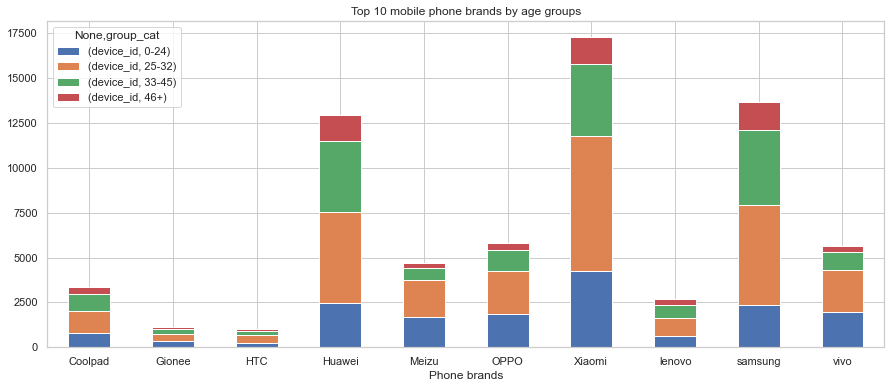

In [44]:
phone_cat = df_temp_filter.groupby(['phone_brand','group_cat']).agg('count')
phone_cat = phone_cat['device_id'].reset_index()
#phone_cat

phone_pivit = phone_cat.pivot(index='phone_brand', columns='group_cat')
phone_pivit.plot(kind='bar', stacked=True, rot=0, figsize=(15,6))
plt.title('Top 10 mobile phone brands by age groups')
plt.xlabel('Phone brands')
plt.show()

Observation: We can see that Xiaomi is most popular brand and it is also popular in 25-32 age group category. Also for old group segment Samsung, Huawei is quite popular.

## Feature engineering

Lets created some other features as suggested in problem statement

### Average events per day for each device

In [45]:
total_events=df_event.groupby('device_id')['event_id'].agg('count')
#total_events

In [46]:
per_day_events = df_event.groupby(['device_id', 'week_day'])['event_id'].agg('count')
per_day_events = per_day_events.reset_index()
per_day_events = per_day_events.groupby('device_id')['event_id'].agg('count')
#per_day_events

In [47]:
average_events_perday=total_events/per_day_events
average_events_perday = average_events_perday.reset_index()
average_events_perday.columns=['device_id', 'avg_events']
average_events_perday.head(2)

df_non_event=df_non_event.merge(average_events_perday, how='left', on='device_id')

### Median used-time per device

In [48]:
from collections import Counter
most_active_fn = df_event.groupby('device_id')['hour_day'].apply(lambda x: Counter(x).most_common(1)[0][0])
df_non_event['most_active_hour']= df_non_event['device_id'].map(most_active_fn)

In [49]:
#check dataset created so far so far
df_non_event.device_id.count(),df_event.device_id.count()  #(74645, 829966)

(74645, 1215598)

> Here we are done with initial EDA tasks. Now we will perform the advance EDA in separate notebook. For this we will save the dataset we have cleaned and shaped so far.

In [50]:
#df_event.head()
df_non_event.head()

,device_id,gender,age,group,phone_brand,device_model,group_cat,avg_events,most_active_hour
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C,33-45,58.400000,15.0
1,6943568600617760000,M,37,M32+,Xiaomi,xnote,33-45,1.000000,11.0
2,5441349705980020000,M,40,M32+,OPPO,R7s,33-45,1.000000,23.0
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4,33-45,2.000000,23.0
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4,46+,16.428571,22.0


In [51]:
df_event.to_csv('../2_Advanced_Visualisation/event_data.csv',index=False)
df_non_event.to_csv('../2_Advanced_Visualisation/non_event_data.csv',index=False)

End of this notebook

----